# Case Study 1 Part 3

## Machine Learning Model

- In this part we are going to perform various machine learning model to train our data and also to validate them.
- Also we find out the best model by checking the test score from Kaggle website

In [1]:
from scipy import sparse 
import pickle
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading set 1 of data

In [2]:
X_train_set1 = sparse.load_npz('train_set_1.npz')
X_test_set1 = sparse.load_npz('test_set_1.npz')

with open('y_train.pickle','rb') as f:
    y_train = pickle.load(f)
    
with open('y_test.pickle','rb') as f:
    y_test = pickle.load(f)

In [3]:
X_train_set1.shape, y_train.shape

((726439, 61369), (726439,))

In [4]:
X_test_set1.shape, y_test.shape

((311332, 61369), (311332,))

### Performing various machine learning modlling on set 1 data

Before going to modelling lets discuss about the data and  our approach

- As we can see the shape of the set1 data is huge, 726439 rows and 61369 columns
- As the data set is very much sparse, first we perform the linear regression with L1 regularisation, SGDregressor with L1 regulation, and make note of the cross valiadtion result.
- After that we will perform others techniques, like decision tree, random forest nd xgboost on it

In [5]:
from sklearn.metrics import mean_squared_error

def evaluation(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)
    
    
    
    return y_predict_train, y_predict_test, model
    

### Lasso Rigression

Since the data set is sparse, so our 1st choice will be the linear regression with L1 regularisation (Lasso Regression)

In [6]:
lasso = Lasso()
params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
random_lasso = RandomizedSearchCV( lasso, params, scoring='neg_mean_squared_error', \
                                   cv=5, n_jobs=-1, return_train_score=True)
lasso_results = random_lasso.fit(X_train_set1, y_train)

In [8]:
best_lasso = random_lasso.best_estimator_

In [9]:
best_lasso

Lasso(alpha=0.001)

In [10]:
with open('best_lasso.pickle','wb') as f:
    pickle.dump(best_lasso, f)
    
with open('random_lasso.pickle','wb') as f:
    pickle.dump(random_lasso, f)

In [10]:
y_predict_train, y_predict_test, best_lasso = evaluation(best_lasso, X_train_set1, y_train, X_test_set1, y_test)

RMSLE values for training data 0.671595730704119
RMSLE values for test data 0.6729181576351324


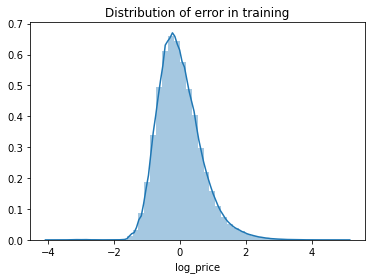

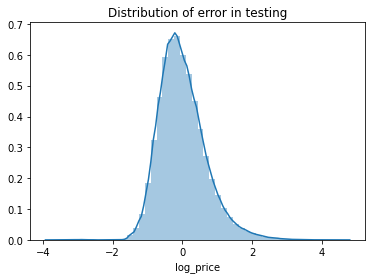

In [12]:
rmsle_train_lasso_tfidf = np.sqrt(mean_squared_error(y_train,y_predict_train))
rmsle_test_lasso_tfidf= np.sqrt(mean_squared_error(y_test,y_predict_test))
print('RMSLE values for training data {}'.format(rmsle_train_lasso_tfidf))
print('RMSLE values for test data {}'.format(rmsle_test_lasso_tfidf))

plt.figure();
sns.distplot(y_train - y_predict_train);
plt.title('Distribution of error in training');
plt.show()
    
plt.figure();
sns.distplot(y_test - y_predict_test);
plt.title('Distribution of error in testing');
plt.show()

In [27]:
with open('best_lasso_final.pickle','wb') as f:
    pickle.dump(best_lasso, f)

### Light GBM

In [16]:
!pip install lightgbm
from lightgbm import LGBMRegressor 

In [19]:
params = {'learning_rate':[0.1, 0.01], 'num_leaves': [30,50], 'n_estimators': [500,800,1000], \
              'min_child_samples': [10,20], 'subsample': [0.6], 'colsample_bytree': [0.6], \
              }
lgb = LGBMRegressor(silent = False, n_jobs=-1)
random_lgb = RandomizedSearchCV(estimator = lgb,param_distributions= params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose = 1)
random_lgb.fit( X_train_set1, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 847.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 1095.9min finished


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 203.301093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1289393
[LightGBM] [Info] Number of data points in the train set: 726439, number of used features: 58619
[LightGBM] [Info] Start training from score 2.979122


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(silent=False), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6],
                                        'learning_rate': [0.1, 0.01],
                                        'min_child_samples': [10, 20],
                                        'n_estimators': [500, 800, 1000],
                                        'num_leaves': [30, 50],
                                        'subsample': [0.6]},
                   scoring='neg_root_mean_squared_error', verbose=1)

In [20]:
random_lgb.best_score_

-0.4738632823143141

In [21]:
best_lgb = random_lgb.best_estimator_

In [22]:
best_lgb

LGBMRegressor(colsample_bytree=0.6, n_estimators=1000, num_leaves=50,
              silent=False, subsample=0.6)

In [23]:
with open('best_lgb.pickle','wb') as f:
    pickle.dump(best_lgb, f)
    
with open('random_lgb.pickle','wb') as f:
    pickle.dump(random_lgb, f)

In [24]:
y_predict_train_lgb, y_predict_test_lgb, best_lgb = evaluation(best_lgb, X_train_set1, y_train, X_test_set1, y_test)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 203.681846 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1289393
[LightGBM] [Info] Number of data points in the train set: 726439, number of used features: 58619
[LightGBM] [Info] Start training from score 2.979122


RMSLE values for training data 0.44662993880356383
RMSLE values for test data 0.4725388586101557


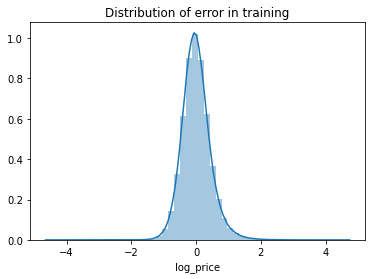

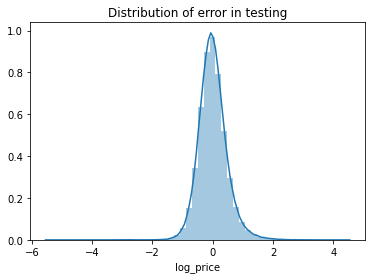

In [25]:
rmsle_train_lgb_tfidf = np.sqrt(mean_squared_error(y_train,y_predict_train_lgb))
rmsle_test_lgb_tfidf = np.sqrt(mean_squared_error(y_test,y_predict_test_lgb))
print('RMSLE values for training data {}'.format(rmsle_train_lgb_tfidf))
print('RMSLE values for test data {}'.format(rmsle_test_lgb_tfidf))

plt.figure();
sns.distplot(y_train - y_predict_train_lgb);
plt.title('Distribution of error in training');
plt.show()
    
plt.figure();
sns.distplot(y_test - y_predict_test_lgb);
plt.title('Distribution of error in testing');
plt.show()

In [26]:
with open('best_lgb_final.pickle','wb') as f:
    pickle.dump(best_lgb, f)

### XGBoost

In [6]:
xgb = XGBRegressor(n_jobs = -1) 

params = {'learning_rate':[0.1, 0.01], 'num_leaves': [30,50], 'n_estimators': [500,800,1000], 
              'min_child_samples': [10,20], 'subsample': [0.6], 'colsample_bytree': [0.6],  'max_depth' :[3,5],'gamma' : [0.2,0.3,0.4]}


random_xgb = RandomizedSearchCV(xgb,params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose = 1,n_iter=15 )
random_xgb.fit( X_train_set1, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 407.7min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 740.0min finished


[08:39:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_child_samples, num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [7]:
random_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_samples=20, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_leaves=30, num_parallel_tree=1, random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
random_xgb.best_score_

-0.51478354464056

In [11]:
with open('best_xgb.pickle','wb') as f:
    pickle.dump(random_xgb.best_estimator_, f)
    
with open('random_xgb.pickle','wb') as f:
    pickle.dump(random_xgb, f)

In [12]:
y_predict_train_xgb, y_predict_test_xgb, best_xgb = evaluation(best_xgb, X_train_set1, y_train, X_test_set1, y_test)

[16:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_child_samples, num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RMSLE values for training data 0.5007623324936978
RMSLE values for test data 0.515198962954722


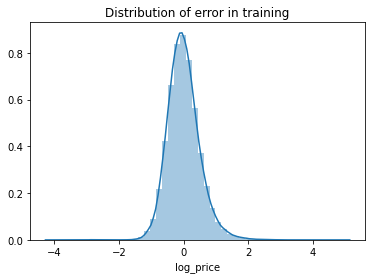

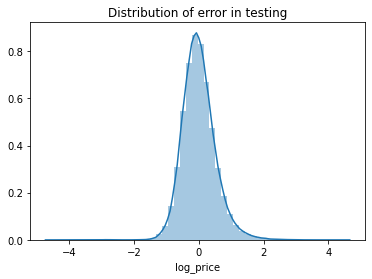

In [13]:
rmsle_train_xgb_tfidf = np.sqrt(mean_squared_error(y_train,y_predict_train_xgb))
rmsle_test_xgb_tfidf = np.sqrt(mean_squared_error(y_test,y_predict_test_xgb))
print('RMSLE values for training data {}'.format(rmsle_train_xgb_tfidf))
print('RMSLE values for test data {}'.format(rmsle_test_xgb_tfidf))

plt.figure();
sns.distplot(y_train - y_predict_train_xgb);
plt.title('Distribution of error in training');
plt.show()
    
plt.figure();
sns.distplot(y_test - y_predict_test_xgb);
plt.title('Distribution of error in testing');
plt.show()

In [14]:
with open('best_xgb_final.pickle','wb') as f:
    pickle.dump(best_xgb, f)

### Loading set 2 data

In [1]:
from scipy import sparse 
import pickle
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
X_train_set2 = sparse.load_npz('train_set_2.npz')
#X_test_set2 = sparse.load_npz('test_set_2.npz')

with open('y_train.pickle','rb') as f:
    y_train_set2 = pickle.load(f)
    
#with open('y_test.pickle','rb') as f:
#    y_test_set2 = pickle.load(f)
    
X_train_set2.shape, y_train_set2.shape

In [3]:
#from sklearn.model_selection import train_test_split
#X_train_set2_sample,_,Y_train_set2_sample,_ = train_test_split(X_train_set2,y_train_set2, train_size = 0.1)

In [4]:
#X_train_set2_sample.shape,Y_train_set2_sample.shape

((72643, 615), (72643,))

### Modeling

**XGBoost**

In [5]:
xgb = XGBRegressor(n_jobs = -1) 

params = {'learning_rate':[0.1, 0.01,0.001],'n_estimators': [800,1000],'subsample': [0.6], 'colsample_bytree': [0.6],'max_depth' :[3,5],'gamma' : [0.2,0.3]}


random_xgb = RandomizedSearchCV(xgb,params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose = 1,n_iter=15)
random_xgb.fit( X_train_set2, y_train_set2)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 851.4min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 1355.7min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [7]:
best_xgb_w2v = random_xgb.best_estimator_
best_xgb_w2v

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=800, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
with open('best_xgb_w2v.pickle','wb') as f:
    pickle.dump(best_xgb_w2v, f)
    
with open('random_xgb_w2v.pickle','wb') as f:
    pickle.dump(random_xgb, f)

In [9]:
best_xgb_w2v.fit(X_train_set2,y_train_set2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=800, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
with open('best_xgb_w2v_final.pickle','wb') as f:
    pickle.dump(best_xgb_w2v, f)

In [11]:
X_test_set2 = sparse.load_npz('test_set_2.npz')

    
with open('y_test.pickle','rb') as f:
    y_test_set2 = pickle.load(f)

In [13]:
y_predict_train_xgb = best_xgb_w2v.predict(X_train_set2)
y_predict_test_xgb = best_xgb_w2v.predict(X_test_set2)

RMSLE values for training data 0.5130720211580576
RMSLE values for test data 0.535324818564034


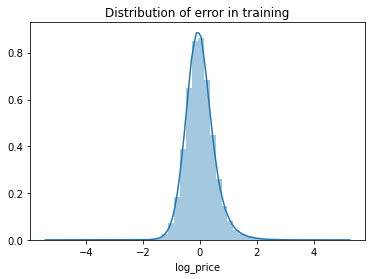

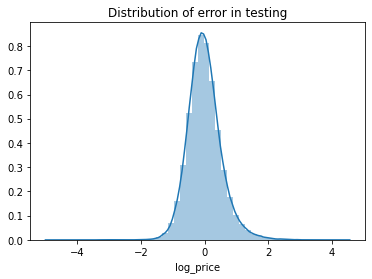

In [16]:
from sklearn.metrics import mean_squared_error
rmsle_train_xgb_w2v = np.sqrt(mean_squared_error(y_train_set2,y_predict_train_xgb))
rmsle_test_xgb_w2v = np.sqrt(mean_squared_error(y_test_set2,y_predict_test_xgb))
print('RMSLE values for training data {}'.format(rmsle_train_xgb_w2v))
print('RMSLE values for test data {}'.format(rmsle_test_xgb_w2v))

plt.figure();
sns.distplot(y_train_set2 - y_predict_train_xgb);
plt.title('Distribution of error in training');
plt.show()
    
plt.figure();
sns.distplot(y_test_set2 - y_predict_test_xgb);
plt.title('Distribution of error in testing');
plt.show()

**Light GBM**

In [17]:
from lightgbm import LGBMRegressor
params = {'learning_rate':[0.1, 0.01], 'num_leaves': [30,50], 'n_estimators': [500,800,1000], \
          'min_child_samples': [10,20], 'subsample': [0.6], 'colsample_bytree': [0.6]}
lgb = LGBMRegressor(silent = False, n_jobs=-1)
random_lgb = RandomizedSearchCV(estimator = lgb,param_distributions= params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose = 1)
random_lgb.fit( X_train_set2, y_train_set2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 36.7min finished


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.307999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153649
[LightGBM] [Info] Number of data points in the train set: 72643, number of used features: 615
[LightGBM] [Info] Start training from score 2.982702


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(silent=False), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6],
                                        'learning_rate': [0.1, 0.01],
                                        'min_child_samples': [10, 20],
                                        'n_estimators': [500, 800, 1000],
                                        'num_leaves': [30, 50],
                                        'subsample': [0.6]},
                   scoring='neg_root_mean_squared_error', verbose=1)

In [20]:
best_lgb_w2v = random_lgb.best_estimator_
with open('best_lgb_w2v.pickle','wb') as f:
    pickle.dump(best_lgb_w2v, f)
    
with open('random_lgb_w2v.pickle','wb') as f:
    pickle.dump(random_lgb, f)

In [21]:
best_lgb_w2v.fit(X_train_set2,y_train_set2)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 3.015719 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153652
[LightGBM] [Info] Number of data points in the train set: 726439, number of used features: 615
[LightGBM] [Info] Start training from score 2.979122


LGBMRegressor(colsample_bytree=0.6, min_child_samples=10, n_estimators=1000,
              num_leaves=30, silent=False, subsample=0.6)

In [22]:
with open('best_lgb_w2v_final.pickle','wb') as f:
    pickle.dump(best_lgb_w2v, f)

In [23]:
y_predict_train_lgb = best_lgb_w2v.predict(X_train_set2)
y_predict_test_lgb = best_lgb_w2v.predict(X_test_set2)

RMSLE values for training data 0.49596027862853476
RMSLE values for test data 0.5272279548908185


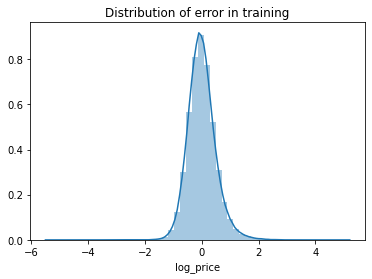

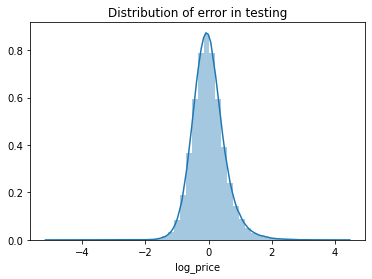

In [25]:

rmsle_train_lgb_w2v = np.sqrt(mean_squared_error(y_train_set2,y_predict_train_lgb))
rmsle_test_lgb_w2v = np.sqrt(mean_squared_error(y_test_set2,y_predict_test_lgb))
print('RMSLE values for training data {}'.format(rmsle_train_lgb_w2v))
print('RMSLE values for test data {}'.format(rmsle_test_lgb_w2v))

plt.figure();
sns.distplot(y_train_set2 - y_predict_train_lgb);
plt.title('Distribution of error in training');
plt.show()
    
plt.figure();
sns.distplot(y_test_set2 - y_predict_test_lgb);
plt.title('Distribution of error in testing');
plt.show()

**Summary of all the models**

In [7]:
import pandas as pd

summary = pd.DataFrame({'Model_Name':['Lasso_with_Tf-idf','LGB_with_Tf-idf','XGB_with_TF-idf','XGB_with_w2v','LGB_with_w2v'],
                        'Train_Score': [rmsle_train_lasso_tfidf,rmsle_train_lgb_tfidf,rmsle_train_xgb_tfidf,rmsle_train_xgb_w2v,rmsle_train_lgb_w2v], 
                        'Test_Score':[rmsle_test_lasso_tfidf,rmsle_test_lgb_tfidf,rmsle_test_xgb_tfidf, rmsle_test_xgb_w2v,rmsle_test_lgb_w2v] } )
summary

,Model_Name,Train_Score,Test_Score
0,Lasso_with_Tf-idf,0.6715,0.67290
1,LGB_with_Tf-idf,0.4466,0.47253
2,XGB_with_TF-idf,0.5007,0.51510
3,XGB_with_w2v,0.5130,0.53530
4,LGB_with_w2v,0.4959,0.52700


From the above summary we can say that **Light GBM model with TFIDF** works pretty well than others, hence we will use this model for further task